#Name: Kunal Nalawade

#UID: 2018130031

# Experiment 3: Fuzzy Controllers

#### Aim: Design a fuzzy controller for the given problem statement

#### Problem statement: The tipping problem



In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

3 descriptors for input food quality: ***rancid, okay, delicious***

3 descriptors for input service: ***poor, average, good***

Tip has 5 descriptors: ***dismal, low, medium, high, generous***


Triangular membership function used

In [ ]:
quality = ctrl.Antecedent(list(range(0, 11)), 'quality')
service = ctrl.Antecedent(list(range(0, 11)), 'service')
tip = ctrl.Consequent(list(range(0, 21)), label='tip')

quality.automf(3, names=['rancid', 'okay', 'delicious'])
service.automf(3, names=['poor', 'average', 'good'])
tip.automf(5, names=['dismal', 'low', 'medium', 'high' ,'generous'])

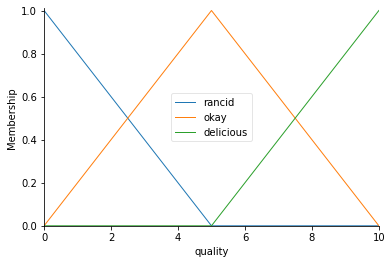

In [ ]:
# fuzzy relationship graph
quality.view()

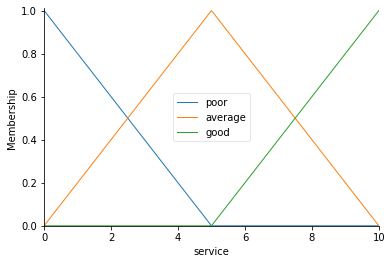

In [ ]:
service.view()

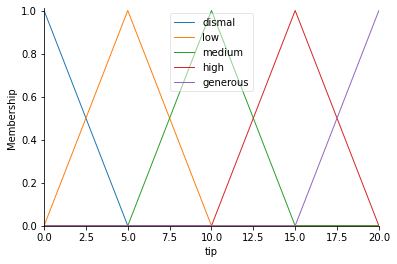

In [ ]:
tip.view()

#### RULES

<table>
<tr>
<th>quality\service</th>
<th>poor</th>
<th>average</th>
<th>good</th>
</tr>

<tr>
<td>rancid</td>
<td>dismal</td>
<td>low</td>
<td>low</td>
</tr>

<tr>
<td>okay</td>
<td>low</td>
<td>medium</td>
<td>high</td>
</tr>

<tr>
<td>delicious</td>
<td>medium</td>
<td>high</td>
<td>generous</td>
</tr>

</table>


In [ ]:
rule1 = ctrl.Rule(service['good'] & quality['delicious'], tip['generous'])
rule2 = ctrl.Rule(service['poor'] & quality['rancid'], tip['dismal'])
rule3 = ctrl.Rule(service['average'] & quality['okay'], tip['medium'])
rule4 = ctrl.Rule(service['good'] & quality['okay'], tip['high'])
rule5 = ctrl.Rule(service['average'] & quality['delicious'], tip['high'])
rule6 = ctrl.Rule(service['average'] & quality['rancid'], tip['low'])
rule7 = ctrl.Rule(service['poor'] & quality['okay'], tip['low'])
rule8 = ctrl.Rule(service['poor'] & quality['delicious'], tip['medium'])
rule9 = ctrl.Rule(service['good'] & quality['rancid'], tip['low'])

# Establish the rules in fuzzy control system
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tip_ctrl)

The tip is : 14.33%



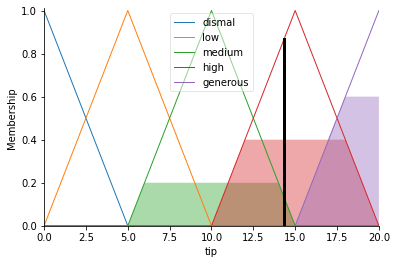

In [ ]:
# Test with an input
tipping.input['quality'] = 8
tipping.input['service'] = 9
tipping.compute()
print(f"The tip is : {tipping.output['tip']:.2f}%\n")
tip.view(sim=tipping)

# Conclusion

1.   The skfuzzy library is used to implement fuzzy controllers in Python.
2.   The fuzzy controller in this experiment gives the tipping percentage on the basis of quality of food and service.
3. The fuzzy rules specify membership of the output variable on the basis of the membership of input variables
4. 3 descriptors for input food quality: rancid, okay, delicious

    3 descriptors for input service: poor, average, good

    Tip has 5 descriptors: dismal, low, medium, high, generous

5. Triangular membership function used
6. The output is the percentage of the bill that is going to be tipped.
7. So, with quality of food is 8 and quality of service is 9, the tipping would be 19% which is shown by the black line in the graph.



